
# Distribution statistics

This notebooks explores the probability distributions we get from component models and tries to see if basic statistics are enought to represent the information they relay.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../../src")

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import data

from scipy.stats import norm

## Load data

Here we read probabily distributions for week ahead targets from all the models

In [5]:
kcde_dl = data.ComponentDataLoader("../../data", "kcde")
kde_dl = data.ComponentDataLoader("../../data", "kde")
sarima_dl = data.ComponentDataLoader("../../data", "sarima")

### Looking at one week ahead predictions

In [55]:
# Skipping last bin which represents values from 13 to 100%

kcde_dist = np.exp(kcde_dl.get("one_wk")[1][:, :-1])
kde_dist = np.exp(kde_dl.get("one_wk")[1][:, :-1])
sarima_dist = np.exp(sarima_dl.get("one_wk")[1][:, :-1])

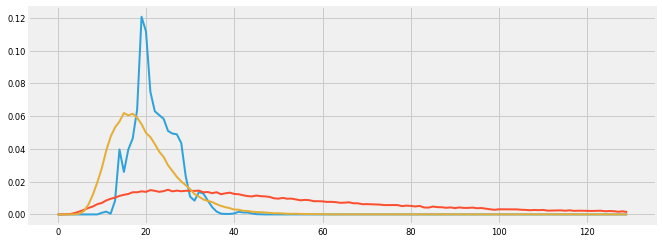

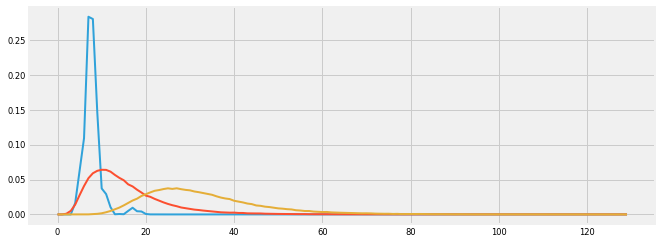

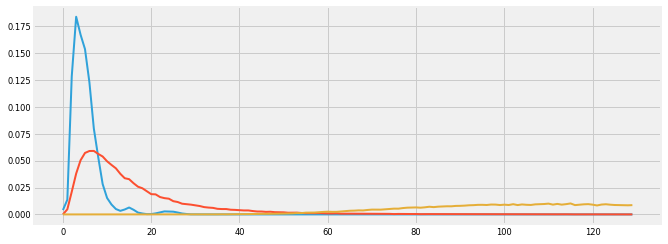

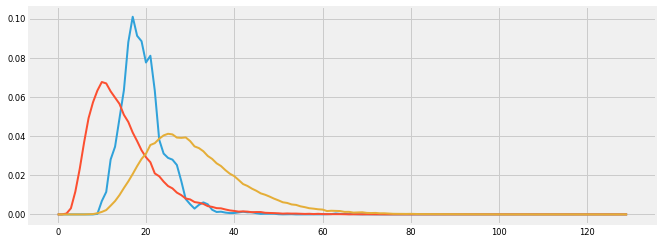

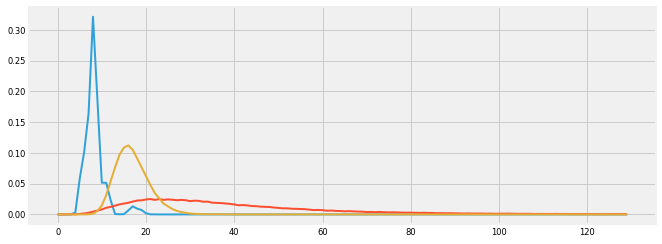

In [56]:
# Show random distributions
# NOTE: Distributions of different models don't align in time.

for i in range(5):
    plt.figure(figsize=(10, 4))
    plt.plot(kcde_dist[np.random.randint(0, kcde_dist.shape[0]), :])
    plt.plot(kde_dist[np.random.randint(0, kde_dist.shape[0]), :])
    plt.plot(sarima_dist[np.random.randint(0, sarima_dist.shape[0]), :])

## Simple representations

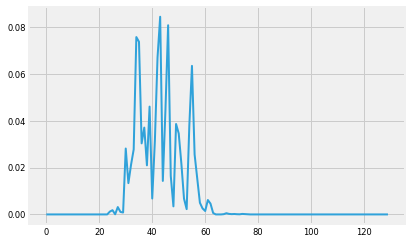

In [122]:
dist = kcde_dist[100, ]
plt.plot(dist)

In [123]:
# Functions for working with 0,12.9 distributions

def dist_mean(distribution, bins=np.linspace(0, 12.9, 130)):
    return (bins * distribution).sum()

def dist_max(distribution, bins=np.linspace(0, 12.9, 130)):
    return bins[np.argmax(distribution)]

def dist_std(distribution, bins=np.linspace(0, 12.9, 130)):
    mean = dist_mean(distribution, bins)
    var = (((bins - mean) ** 2) * distribution).sum()
    return np.sqrt(var)

def dist_median(distribution, bins=np.linspace(0, 12.9, 130)):
    return ((np.cumsum(distribution) < 0.5) * bins).max()

def dist_quartiles(distribution, bins=np.linspace(0, 12.9, 130)):
    return [
        ((np.cumsum(distribution) < i) * bins).max()
        for i in [0.25, 0.5, 0.75]
    ]

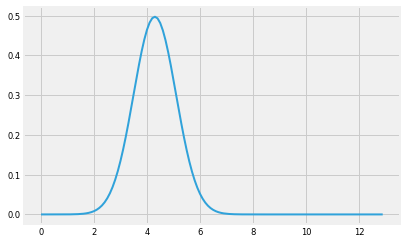

In [124]:
n = norm(loc=dist_mean(dist), scale=dist_std(dist))
plt.plot(bins, n.pdf(bins))